<a href="https://colab.research.google.com/github/datakind/UWWi_DataDive_Dec22/blob/main/United_Way_WI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# United way WI Breakout room 2

## Standard libraries and data loading functions

In [119]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import os
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display_html
import regex as re

Notebook Color Schemes:


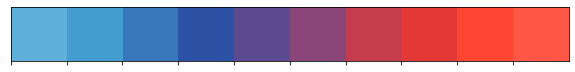

In [120]:
# https://www.kaggle.com/code/andradaolteanu/rsna-fracture-detection-dicom-images-explore
class clr:
    S = '\033[1m' + '\033[94m'
    E = '\033[0m'
    
my_colors = ["#5EAFD9", "#449DD1", "#3977BB", 
             "#2D51A5", "#5C4C8F", "#8B4679",
             "#C53D4C", "#E23836", "#FF4633", "#FF5746"]
CMAP1 = ListedColormap(my_colors)

print(clr.S+"Notebook Color Schemes:"+clr.E)
sns.palplot(sns.color_palette(my_colors))
plt.show()

def get_csv_info(csv, name="Default"):
    '''Prints main information for the speciffied .csv file.'''
    
    print(clr.S+f"=== {name} ==="+clr.E)
    print(clr.S+f"Shape:"+clr.E, csv.shape)
    print(clr.S+f"Missing Values:"+clr.E, csv.isna().sum().sum(), "total missing datapoints.")
    print(clr.S+"Columns:"+clr.E, list(csv.columns), "\n")
    
    display_html(csv.tail())
    print("\n")

## News Headlines

In [121]:
# https://github.com/bsenst/UWWi_DataDive_Dec22/blob/main/notebooks/news_apis.ipynb

! pip install GoogleNews
from GoogleNews import GoogleNews

googlenews = GoogleNews(start='01/01/2017',end='02/01/2017')

googlenews.search('Wisconsin')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [122]:
for i in range(1, 5):
  result = googlenews.page_at(i)
  first_result = result[0]
  print(len(result), first_result["title"], first_result["date"])

10 Sink the boat: Wisconsin defeats Western Michigan in Cotton ... an 2, 2017
10 Calorie restriction lets monkeys live long and prosper an 17, 2017
10 Rose Lavelle of Wisconsin Badgers goes No. 1 to Boston ... an 12, 2017
10 Republicans condemn university's masculinity program as a 'war on men' an 9, 2017


## Weather Dataset
Ben L

In [123]:
weather_df = pd.read_csv('/content/Weather data/Wisconsin_Weather_WY2017-2023.csv')
get_csv_info(weather_df)

FileNotFoundError: ignored

In [ ]:
from datetime import datetime
interactions_df = pd.read_csv('https://github.com/datakind/UWWi_DataDive_Dec22/blob/main/uwwi_datasets/uwwi_dataset_interactions/uwwi_dataset_interactions_2022.csv?raw=true', parse_dates=['Interaction_CreateStamp'])
get_csv_info(interactions_df, 'interactions')

In [ ]:
interactions_df2 = pd.DataFrame()
interactions_df2['Date'] = interactions_df['Interaction_CreateStamp'].astype('string').str[:10]
interactions_df2['Time'] = interactions_df['Interaction_CreateStamp'].astype('string').str[11:16]
interactions_df2['Interaction_Id'] = interactions_df['Interaction_Id']
interactions_df2.tail()

In [ ]:
interactions_df = interactions_df2
get_csv_info(interactions_df)

In [ ]:
interactions_df['Date'] = interactions_df['Date'].astype('datetime64')
interactions_df['Time'] = pd.to_datetime(interactions_df['Time'], format='%H:%M').apply(pd.Timestamp)


In [ ]:
def make_date(df, date_field:str):
    "Make sure `df[field_name]` is of the right date type."
    field_dtype = df[date_field].dtype
    if isinstance(field_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
        field_dtype = np.datetime64
    if not np.issubdtype(field_dtype, np.datetime64):
        df[date_field] = pd.to_datetime(df[date_field], infer_datetime_format=True)
        

def add_datepart(df, fldnames, drop=True, time=False, errors="raise"):
    # add_datepart converts a column of df from a datetime64 to many columns containing the information from the date. 
    # This applies changes inplace.
    if isinstance(fldnames,str): 
        fldnames = [fldnames]
    for fldname in fldnames:
        fld = df[fldname]
        fld_dtype = fld.dtype
        if isinstance(fld_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
            fld_dtype = np.datetime64

        if not np.issubdtype(fld_dtype, np.datetime64):
            df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True, errors=errors)
        targ_pre = re.sub('[Dd]ate$', '', fldname)
        attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
                'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']
        if time: attr = attr + ['Hour', 'Minute', 'Second']
        for n in attr: df[targ_pre + n] = getattr(fld.dt, n.lower())
        df[targ_pre + 'Elapsed'] = fld.astype(np.int64) // 10 ** 9
        if drop: df.drop(fldname, axis=1, inplace=True)

In [ ]:
add_datepart(interactions_df, 'Date')
add_datepart(interactions_df, 'Time')


In [ ]:
interactions_df.tail()

In [ ]:

#group by date
# group by primary need
#sum interactions 
# = number of interactions per day
# fit, and feature importance


In [ ]:
weather_df.columns

testing [Helen]
Ben L can see this

# 211 Data Analysis: Kimberly W


In [124]:
import pandas as pd
sites = pd.read_csv('https://github.com/datakind/UWWi_DataDive_Dec22/blob/main/uwwi_datasets/uwwi_dataset_sites.csv?raw=true')

In [125]:
sites.head()


,AgencySystem_Name,Agency_Id,Site_Id,Site_AgencyId,Site_CreateStamp,Site_EditStamp,Site_AuditStamp,Site_Status,SiteSystem_Active,SiteSystem_Name,...,SiteAddressus_SiteAddressus_validated,SiteAddressus_SiteAddressus_custom_location,SiteAddressus_SiteAddressus_zip_latitude,SiteAddressus_SiteAddressus_zip_longitude,SiteAddressus_SiteAddressus,SiteOption_PermanentlyInactiveSite,SiteOption_RecordOwner,SiteOption_Accessibility,SiteCustom_NonStandardHoursText,SiteHoursofoperation_ModuleHoursofoperation.open
0,INTEGRATED COMMUNITY SOLUTIONS,1,414.0,1.0,2017-03-16T10:32:21.216012-05:00,2022-05-12T12:53:25.967449-05:00,NaN,active,Yes,INTEGRATED COMMUNITY SOLUTIONS,...,True,False,44.489906,-88.06991,"2605 S ONEIDA ST Suite 106 GREEN BAY WI, 54304",[],['BCUW'],[],Monday-Friday 8am-4:30pm,"[{'day': -1, 'end_min': None, 'end_hour': None..."
1,INTEGRATED COMMUNITY SOLUTIONS,1,418.0,1.0,2017-03-16T10:32:22.867221-05:00,2021-10-21T19:48:22.74763-05:00,NaN,active,No,ZZZINACTIVE LEAVING HOMELESSNESS BEHIND,...,False,False,44.489906,-88.06991,2605 South Oneida Street Suite 106 Green Bay W...,[],['BCUW'],[],"Monday-Friday, 8:00am-4:30pm","[{'day': -1, 'end_min': None, 'end_hour': None..."
2,INTERIM HEALTH CARE,2,419.0,2.0,2017-03-16T10:32:23.227182-05:00,2022-11-30T13:36:50.613023-06:00,NaN,active,Yes,INTERIM HEALTH CARE,...,False,False,44.542973,-88.05582,"1600 Shawano Avenue Suite 201 Green Bay WI, 54303",[],['BCUW'],[],Monday-Friday 8:30am-5:00pm,"[{'day': -1, 'end_min': None, 'end_hour': None..."
3,zzinactive_INTERNATIONAL TRANSLATORS,3,420.0,3.0,2017-03-16T10:32:23.567045-05:00,2021-07-27T23:57:41.974815-05:00,NaN,active,No,zzinactive_VILLA REAL DBA INTERNATIONAL TRANSL...,...,False,False,44.483376,-88.02269,529 South Jefferson Street Suite 203 Green Bay...,[],['BCUW'],"['Elevators', 'Outside Ramps']","Monday-Friday, 8:00am-5:00pm; Interpreters ava...","[{'day': -1, 'end_min': None, 'end_hour': None..."
4,JACKIE NITSCHKE CENTER,4,421.0,4.0,2017-03-16T10:32:23.869975-05:00,2022-09-28T10:20:58.151543-05:00,NaN,active,Yes,JACKIE NITSCHKE CENTER,...,True,False,44.483376,-88.02269,"630 CHERRY STREET GREEN BAY WI, 54301",[],['BCUW'],[],Business hours: Monday-Thursday 7am-6:30pm; Fr...,"[{'day': -1, 'end_min': None, 'end_hour': None..."


In [126]:
sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20583 entries, 0 to 20582
Data columns (total 32 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   AgencySystem_Name                                 20572 non-null  object 
 1   Agency_Id                                         20583 non-null  int64  
 2   Site_Id                                           20071 non-null  float64
 3   Site_AgencyId                                     20071 non-null  float64
 4   Site_CreateStamp                                  20071 non-null  object 
 5   Site_EditStamp                                    20071 non-null  object 
 6   Site_AuditStamp                                   0 non-null      float64
 7   Site_Status                                       20071 non-null  object 
 8   SiteSystem_Active                                 20583 non-null  object 
 9   SiteSystem_Name  

In [ ]:
import seaborn as sns


In [ ]:
sns.heatmap(sites.isnull(),cbar=True, vmin=0,vmax=.3)

In [127]:
sites.isnull().sum() # There is signnificant absence of data in Auditstamp, address2,notes, and description.  The lattermost is unfortunate as it would help us to map out types of service by location. Might be 
#able to determine what types of service they provde based on agency ID and map it. ** TO DO


AgencySystem_Name                                      11
Agency_Id                                               0
Site_Id                                               512
Site_AgencyId                                         512
Site_CreateStamp                                      512
Site_EditStamp                                        512
Site_AuditStamp                                     20583
Site_Status                                           512
SiteSystem_Active                                       0
SiteSystem_Name                                       512
SiteSystem_Description                              13156
SiteSystem_TravelInformation                        19232
SiteAddressus_SiteAddressus_address_1                2247
SiteAddressus_SiteAddressus_address_2               17645
SiteAddressus_SiteAddressus_city                      888
SiteAddressus_SiteAddressus_county                   1038
SiteAddressus_SiteAddressus_state                     925
SiteAddressus_

In [128]:
sites.shape

(20583, 32)

In [129]:
drop_cols = ['Site_AuditStamp','SiteSystem_TravelInformation','SiteAddressus_SiteAddressus_address_2','SiteAddressus_SiteAddressus_notes']


In [130]:
sites.drop(drop_cols, inplace = True, axis = 1)

In [131]:
sites.head()

,AgencySystem_Name,Agency_Id,Site_Id,Site_AgencyId,Site_CreateStamp,Site_EditStamp,Site_Status,SiteSystem_Active,SiteSystem_Name,SiteSystem_Description,...,SiteAddressus_SiteAddressus_validated,SiteAddressus_SiteAddressus_custom_location,SiteAddressus_SiteAddressus_zip_latitude,SiteAddressus_SiteAddressus_zip_longitude,SiteAddressus_SiteAddressus,SiteOption_PermanentlyInactiveSite,SiteOption_RecordOwner,SiteOption_Accessibility,SiteCustom_NonStandardHoursText,SiteHoursofoperation_ModuleHoursofoperation.open
0,INTEGRATED COMMUNITY SOLUTIONS,1,414.0,1.0,2017-03-16T10:32:21.216012-05:00,2022-05-12T12:53:25.967449-05:00,active,Yes,INTEGRATED COMMUNITY SOLUTIONS,NaN,...,True,False,44.489906,-88.06991,"2605 S ONEIDA ST Suite 106 GREEN BAY WI, 54304",[],['BCUW'],[],Monday-Friday 8am-4:30pm,"[{'day': -1, 'end_min': None, 'end_hour': None..."
1,INTEGRATED COMMUNITY SOLUTIONS,1,418.0,1.0,2017-03-16T10:32:22.867221-05:00,2021-10-21T19:48:22.74763-05:00,active,No,ZZZINACTIVE LEAVING HOMELESSNESS BEHIND,NaN,...,False,False,44.489906,-88.06991,2605 South Oneida Street Suite 106 Green Bay W...,[],['BCUW'],[],"Monday-Friday, 8:00am-4:30pm","[{'day': -1, 'end_min': None, 'end_hour': None..."
2,INTERIM HEALTH CARE,2,419.0,2.0,2017-03-16T10:32:23.227182-05:00,2022-11-30T13:36:50.613023-06:00,active,Yes,INTERIM HEALTH CARE,NaN,...,False,False,44.542973,-88.05582,"1600 Shawano Avenue Suite 201 Green Bay WI, 54303",[],['BCUW'],[],Monday-Friday 8:30am-5:00pm,"[{'day': -1, 'end_min': None, 'end_hour': None..."
3,zzinactive_INTERNATIONAL TRANSLATORS,3,420.0,3.0,2017-03-16T10:32:23.567045-05:00,2021-07-27T23:57:41.974815-05:00,active,No,zzinactive_VILLA REAL DBA INTERNATIONAL TRANSL...,NaN,...,False,False,44.483376,-88.02269,529 South Jefferson Street Suite 203 Green Bay...,[],['BCUW'],"['Elevators', 'Outside Ramps']","Monday-Friday, 8:00am-5:00pm; Interpreters ava...","[{'day': -1, 'end_min': None, 'end_hour': None..."
4,JACKIE NITSCHKE CENTER,4,421.0,4.0,2017-03-16T10:32:23.869975-05:00,2022-09-28T10:20:58.151543-05:00,active,Yes,JACKIE NITSCHKE CENTER,NaN,...,True,False,44.483376,-88.02269,"630 CHERRY STREET GREEN BAY WI, 54301",[],['BCUW'],[],Business hours: Monday-Thursday 7am-6:30pm; Fr...,"[{'day': -1, 'end_min': None, 'end_hour': None..."


In [132]:
sites['SiteSystem_Description'].describe()

count                                                  7427
unique                                                 5943
top       Narcotics Anonymous is a nonprofit fellowship ...
freq                                                     79
Name: SiteSystem_Description, dtype: object

In [133]:
sites['SiteOption_PermanentlyInactiveSite'].head(20)

0                                []
1                                []
2                                []
3                                []
4                                []
5                   ['Yes - Other']
6     ['Yes - Closed Organization']
7                                []
8                                []
9                                []
10                               []
11                               []
12                               []
13                               []
14                           ['No']
15                               []
16    ['Yes - Closed Organization']
17                               []
18                               []
19                               []
Name: SiteOption_PermanentlyInactiveSite, dtype: object

In [134]:
closed = sites[sites['SiteOption_PermanentlyInactiveSite'].str.contains('Yes')] #these sites are closed...some permanently but for purpose of analysis going to omit.
closed

,AgencySystem_Name,Agency_Id,Site_Id,Site_AgencyId,Site_CreateStamp,Site_EditStamp,Site_Status,SiteSystem_Active,SiteSystem_Name,SiteSystem_Description,...,SiteAddressus_SiteAddressus_validated,SiteAddressus_SiteAddressus_custom_location,SiteAddressus_SiteAddressus_zip_latitude,SiteAddressus_SiteAddressus_zip_longitude,SiteAddressus_SiteAddressus,SiteOption_PermanentlyInactiveSite,SiteOption_RecordOwner,SiteOption_Accessibility,SiteCustom_NonStandardHoursText,SiteHoursofoperation_ModuleHoursofoperation.open
5,ZZZANGELS ON HUMBOLDT,5,424.0,5.0,2017-03-16T10:32:24.982683-05:00,2022-10-31T08:35:10.985868-05:00,active,No,ZZZANGELS ON HUMBOLDT,NaN,...,False,False,44.519512,-87.90283,"653 Woodside Road Green Bay WI, 54311",['Yes - Other'],['BCUW'],[],"Available 24 hours a day, seven days a week","[{'day': -1, 'end_min': None, 'end_hour': None..."
6,ZZZKRIDER'S PHARMACY,6,425.0,6.0,2017-03-16T10:32:25.301894-05:00,2021-10-28T12:29:13.795355-05:00,active,No,ZZZKRIDER'S PHARMACY,NaN,...,False,False,44.542973,-88.05582,"1119 West Mason Street Green Bay WI, 54303",['Yes - Closed Organization'],['BCUW'],[],"Monday-Friday, 8:00am-7:00pm; Saturday, 9:00am...","[{'day': -1, 'end_min': None, 'end_hour': None..."
16,ZZZ INACTIVE AMERICAN CANCER SOCIETY- GREEN BAY,16,435.0,16.0,2017-03-16T10:32:29.650615-05:00,2021-11-16T11:42:49.619419-06:00,active,No,ZZZ INACTIVE AMERICAN CANCER SOCIETY- GREEN BAY,NaN,...,True,False,44.483376,-88.02269,"2100 RIVERSIDE DRIVE STE 201 GREEN BAY WI, 54301",['Yes - Closed Organization'],['BCUW'],[],Green Bay Office Hours: Monday-Friday 8 am-4:3...,"[{'day': -1, 'end_min': None, 'end_hour': None..."
28,ZZZ NORTH EAST WISCONSIN AREA OF NARCOTICS ANO...,28,447.0,28.0,2017-03-16T10:32:34.8988-05:00,2022-10-26T08:15:19.29677-05:00,active,No,ZZZ NORTH EAST WISCONSIN AREA OF NARCOTICS ANO...,A substance abuse support group for men and wo...,...,False,False,44.519500,-88.01990,"PO Box 10035 Green Bay WI, 54307",['Yes - Other'],['BCUW'],[],Meetings are held at various times and locatio...,"[{'day': -1, 'end_min': None, 'end_hour': None..."
31,ZZZ INACTIVE NATIONAL ASSOCIATION FOR CONTINENCE,30,455.0,30.0,2017-03-16T10:32:39.348388-05:00,2021-11-16T11:05:52.70937-06:00,active,No,ZZZ INACTIVE NATIONAL ASSOCIATION FOR CONTINENCE,NaN,...,False,False,32.776500,-79.93120,"PO Box 1019 Charleston SC, 29402",['Yes - Other'],['BCUW'],[],"Monday-Friday, 9:00am-5:00pm eastern standard ...","[{'day': -1, 'end_min': None, 'end_hour': None..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20094,ZZZ - ASCENSION SOUTHEAST WISCONSIN - SETON DE...,23745,37818.0,23745.0,2022-03-31T15:34:23.258248-05:00,2022-11-22T08:14:35.466054-06:00,active,No,ZZZ - ASCENSION SOUTHEAST WISCONSIN - SETON DE...,NaN,...,True,False,43.003590,-87.94333,"3267 South 16th Street Suite 101 Milwaukee WI,...",['Yes - Record Moved Elsewhere'],['IPCT'],"['Designated Parking', 'Indoor Wheelchair Acce...","Monday, Wednesday 8am-4:30pm.","[{'day': -1, 'end_min': None, 'end_hour': None..."
20133,ZZZENERGY SERVICES - VILAS COUNTY,23771,37878.0,23771.0,2022-04-20T14:21:34.298942-05:00,2022-09-28T08:15:43.092298-05:00,active,No,ZZZENERGY SERVICES - VILAS COUNTY,NaN,...,True,False,45.951385,-89.26006,"115 South 3rd Street Eagle River WI, 54521",['Yes - Record Moved Elsewhere'],['WIMC'],[],NaN,"[{'day': -1, 'end_min': None, 'end_hour': None..."
20173,ZZZ - TATE,23786,37907.0,23786.0,2022-05-05T09:12:50.35214-05:00,2022-08-24T10:48:23.848871-05:00,active,No,ZZZ - TATE,NaN,...,True,False,43.088013,-87.97704,"4222 West Capitol Drive Suite 7 Milwaukee WI,...",['Yes - No Response When Contacted'],['IPCT'],"['Designated Parking', 'Elevators']","Monday-Thursday 8am-6pm; Friday, Saturday 9am-...","[{'day': -1, 'end_min': None, 'end_hour': None..."
20297,ZZZNORTHLAKES COMMUNITY CLINIC - TURTLE LAKE,23887,38113.0,23887.0,2022-08-05T13:55:33.920686-05:00,2022-10-30T18:47:59.041121-05:00,active,No,ZZZNORTHLAKES COMMUNITY CLINIC - TURTLE LAKE,NorthLak

In [135]:
index_closed = sites[sites['SiteOption_PermanentlyInactiveSite'].str.contains('Yes')].index 

In [136]:
sites.drop(index_closed, inplace=True)  # Getting rid of the sites that are closed so going from 20,583 to 17,675 


In [137]:
sites.shape

(17675, 28)

In [138]:
sites.head()

,AgencySystem_Name,Agency_Id,Site_Id,Site_AgencyId,Site_CreateStamp,Site_EditStamp,Site_Status,SiteSystem_Active,SiteSystem_Name,SiteSystem_Description,...,SiteAddressus_SiteAddressus_validated,SiteAddressus_SiteAddressus_custom_location,SiteAddressus_SiteAddressus_zip_latitude,SiteAddressus_SiteAddressus_zip_longitude,SiteAddressus_SiteAddressus,SiteOption_PermanentlyInactiveSite,SiteOption_RecordOwner,SiteOption_Accessibility,SiteCustom_NonStandardHoursText,SiteHoursofoperation_ModuleHoursofoperation.open
0,INTEGRATED COMMUNITY SOLUTIONS,1,414.0,1.0,2017-03-16T10:32:21.216012-05:00,2022-05-12T12:53:25.967449-05:00,active,Yes,INTEGRATED COMMUNITY SOLUTIONS,NaN,...,True,False,44.489906,-88.06991,"2605 S ONEIDA ST Suite 106 GREEN BAY WI, 54304",[],['BCUW'],[],Monday-Friday 8am-4:30pm,"[{'day': -1, 'end_min': None, 'end_hour': None..."
1,INTEGRATED COMMUNITY SOLUTIONS,1,418.0,1.0,2017-03-16T10:32:22.867221-05:00,2021-10-21T19:48:22.74763-05:00,active,No,ZZZINACTIVE LEAVING HOMELESSNESS BEHIND,NaN,...,False,False,44.489906,-88.06991,2605 South Oneida Street Suite 106 Green Bay W...,[],['BCUW'],[],"Monday-Friday, 8:00am-4:30pm","[{'day': -1, 'end_min': None, 'end_hour': None..."
2,INTERIM HEALTH CARE,2,419.0,2.0,2017-03-16T10:32:23.227182-05:00,2022-11-30T13:36:50.613023-06:00,active,Yes,INTERIM HEALTH CARE,NaN,...,False,False,44.542973,-88.05582,"1600 Shawano Avenue Suite 201 Green Bay WI, 54303",[],['BCUW'],[],Monday-Friday 8:30am-5:00pm,"[{'day': -1, 'end_min': None, 'end_hour': None..."
3,zzinactive_INTERNATIONAL TRANSLATORS,3,420.0,3.0,2017-03-16T10:32:23.567045-05:00,2021-07-27T23:57:41.974815-05:00,active,No,zzinactive_VILLA REAL DBA INTERNATIONAL TRANSL...,NaN,...,False,False,44.483376,-88.02269,529 South Jefferson Street Suite 203 Green Bay...,[],['BCUW'],"['Elevators', 'Outside Ramps']","Monday-Friday, 8:00am-5:00pm; Interpreters ava...","[{'day': -1, 'end_min': None, 'end_hour': None..."
4,JACKIE NITSCHKE CENTER,4,421.0,4.0,2017-03-16T10:32:23.869975-05:00,2022-09-28T10:20:58.151543-05:00,active,Yes,JACKIE NITSCHKE CENTER,NaN,...,True,False,44.483376,-88.02269,"630 CHERRY STREET GREEN BAY WI, 54301",[],['BCUW'],[],Business hours: Monday-Thursday 7am-6:30pm; Fr...,"[{'day': -1, 'end_min': None, 'end_hour': None..."


In [139]:
sites.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17675 entries, 0 to 20582
Data columns (total 28 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   AgencySystem_Name                                 17664 non-null  object 
 1   Agency_Id                                         17675 non-null  int64  
 2   Site_Id                                           17163 non-null  float64
 3   Site_AgencyId                                     17163 non-null  float64
 4   Site_CreateStamp                                  17163 non-null  object 
 5   Site_EditStamp                                    17163 non-null  object 
 6   Site_Status                                       17163 non-null  object 
 7   SiteSystem_Active                                 17675 non-null  object 
 8   SiteSystem_Name                                   17163 non-null  object 
 9   SiteSystem_Descri

In [139]:
#Frustrating conclusion... sites don't give much info... going to upload agencies, clean, and determine analysis... total waste of time other than to save time of others going down same worm hole. Acc to documentation, 
# calls come into agencies who then send to sites so I thought focusing on sites would help indicate where people are getting the services but it's not at all clear that is the case, so will try to suss out agencies and see if 
# it makes sense to merge the two together to send for gps location.  



Tamaras Analysis of Interaction

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

#interaction_data = pd.read_csv(f"../uwwi_datasets/uwwi_dataset_interactions/uwwi_dataset_interactions_2022.csv")
interaction_data = pd.read_csv('https://github.com/datakind/UWWi_DataDive_Dec22/blob/main/uwwi_datasets/uwwi_dataset_interactions/uwwi_dataset_interactions_2022.csv?raw=true')

print(interaction_data.head())



In [ ]:
prim_needs = interaction_data["InteractionOption_SwfPrimaryNeeds"]
call_centers = interaction_data["InteractionOption_CallCenterSiteNew"]

df = pd.DataFrame({"prim_need": prim_needs, "call_centers": call_centers})

primary_needs_list = ["Food", "Utility/Energy", "Housing Payment Assistance", "Shelter", "Mental Health", "Substance Use",
                      "Health Care Coverage","Legal Assistance", "Supportive Listening", "Other Financial Assistance", "Others", "Crisis",
                      "Transportation", "Directory Assistance"]

new_df = pd.DataFrame({"primary_needs": primary_needs_list})

for call_center, filtered_df in df.groupby("call_centers"):
    prim_needs = filtered_df["prim_need"]
    # replace all "Other" with "Others" so that searching for "Other" doesn't trigger "Other financial services" anymore
    prim_needs.replace("('Other')",'Others',regex=True, inplace = True)
    needs_per_call_center_list = []
    for need in primary_needs_list:
        needs_per_call_center_list.append(prim_needs.str.count(need).sum())
    new_df[call_center] = needs_per_call_center_list